In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
from importlib import reload

In [21]:
import camb
import interface
import os
os.environ['OMP_NUM_THREADS'] = '4'

In [24]:
reload(interface)

<module 'interface' from '/cosmosis/cosmosis-standard-library/boltzmann/CAMB-1.0.4/src/interface.py'>

In [25]:
D = []
methods = ['original', 'bird', 'takahashi', 'mead', 'mead2015']
for method in methods:
    print(method)
    d=interface.test(halofit_version=method)
    k, z, P = d.get_matter_power_spectrum(maxkh=100.0)
    D.append([k,z,P])


original
set halofit_version


bird
set halofit_version


takahashi
set halofit_version


mead
set halofit_version


mead2015
set halofit_version


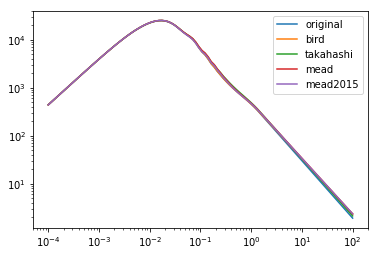

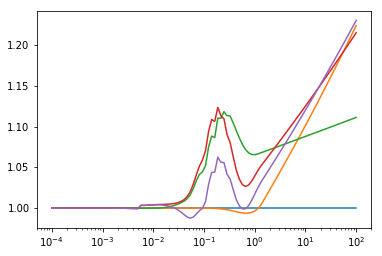

In [26]:
for (k,z,P),m in zip(D, methods):
    loglog(k, P[0], label=m)
legend()
figure()
for (k,z,P),m in zip(D, methods):
    semilogx(k, P[0]/D[0][2][0], label=m)


In [134]:
kextrap = np.logspace(0., 3. , 100)
dlogk = np.log(k1[-1]) - np.log(k1[-2])
dlogp = np.log(P1[0,-1]) - np.log(P1[0,-2])
f = dlogp/dlogk
logpextra = f * (np.log(kextrap)-np.log(k1[-1])) + np.log(P1[0,-1])
def extrap(k):
    p = f * (np.log(k)-np.log(k1[-1])) + np.log(P1[0,-1])
    return np.exp(p)
pextrap = extrap(kextrap)


(1, 100)

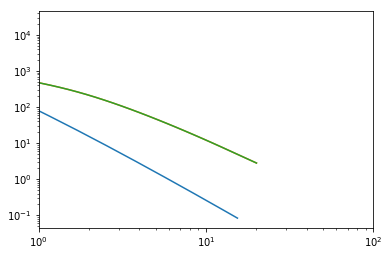

In [138]:
loglog(k, P[0])
loglog(k1, P1[0])
loglog(k2, P2[0])
xlim(1,100)


(1, 100000.0)

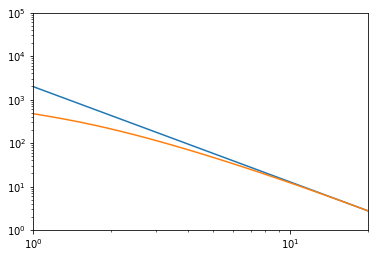

In [80]:
loglog(k1, extrap(k1))
loglog(k1, P1[0])
xlim(1,20)
ylim(1,1e5)

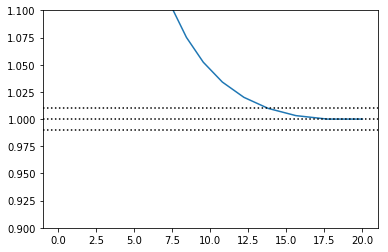

In [94]:
plot(k1, extrap(k1)/P1[0])
ylim(0.9,1.1)
axhline(1, color='k', linestyle=':')
axhline(1.01, color='k', linestyle=':')
axhline(0.99, color='k', linestyle=':')

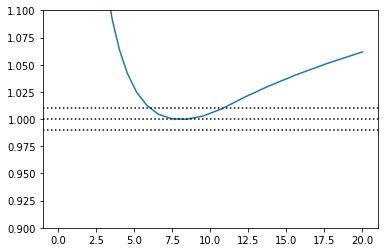

In [97]:
plot(k1, extrap(k2)/P2[0])
ylim(0.9,1.1)
axhline(1, color='k', linestyle=':')
axhline(1.01, color='k', linestyle=':')
axhline(0.99, color='k', linestyle=':')

In [23]:
PK = d.get_matter_power_interpolator();


In [119]:
Mt=d.get_matter_transfer_data()

In [127]:
d.get_matter_power_interpolator(return_z_k=True)

(<camb.results.CAMBdata.get_matter_power_interpolator.<locals>.PKInterpolator at 0x7fd3fb0567b8>,
 array([0.        , 0.02020134, 0.04040268, 0.06060403, 0.08080537,
        0.10100671, 0.12120805, 0.1414094 , 0.16161074, 0.18181208,
        0.20201342, 0.22221477, 0.24241611, 0.26261745, 0.28281879,
        0.30302013, 0.32322148, 0.34342282, 0.36362416, 0.3838255 ,
        0.40402685, 0.42422819, 0.44442953, 0.46463087, 0.48483221,
        0.50503356, 0.5252349 , 0.54543624, 0.56563758, 0.58583893,
        0.60604027, 0.62624161, 0.64644295, 0.6666443 , 0.68684564,
        0.70704698, 0.72724832, 0.74744966, 0.76765101, 0.78785235,
        0.80805369, 0.82825503, 0.84845638, 0.86865772, 0.88885906,
        0.9090604 , 0.92926174, 0.94946309, 0.96966443, 0.98986577,
        1.01006711, 1.03026846, 1.0504698 , 1.07067114, 1.09087248,
        1.11107383, 1.13127517, 1.15147651, 1.17167785, 1.19187919,
        1.21208054, 1.23228188, 1.25248322, 1.27268456, 1.29288591,
        1.31308725

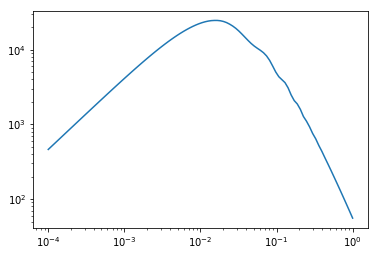

In [8]:
# import camb
# methods = ['original', 'bird', 'takahashi', 'mead', 'mead2015']

# for method in methods:
import camb
halofit = camb.nonlinear.Halofit(halofit_version='peacock')
p=camb.CAMBparams(ombh2=0.022, omch2=0.11, WantTransfer=True, NonLinear='NonLinear_pk', Non)
r=camb.get_results(p)
k,z,P=r.get_matter_power_spectrum()
loglog(k, P[0])

In [30]:
p=camb.CAMBparams(ombh2=0.02, omk=-0.9, omch2=0.999, H0=150.,WantTransfer=True)
d=camb.get_results(p)

class: <Halofit>
 Min_kh_nonlinear = 0.005
 halofit_version = peacock
 